# pollution forecaste 

# import libraries

In [ ]:
! pip install geopandas

     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 6.3 MB 1.5 MB/s 
     |████████████████████████████████| 15.4 MB 20.7 MB/s 


In [ ]:
! pip install geoplot

     |████████████████████████████████| 10.8 MB 12.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 443 kB/s 
     |████████████████████████████████| 219 kB 73.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516303 sha256=12c6d39b22e050dcc8d4c28f527e01ee0156d189e2703d5c2f3b7f123ef1b76e
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import unicodedata
from shapely.geometry import Point
#from geopandas import GeoDataFrame
#import geoplot as gplt
#import geoplot.crs as gcrs
import warnings
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# load data

In [3]:
! unzip air_quality_index.csv.zip

Archive:  air_quality_index.csv.zip
  inflating: air_quality_index.csv   


In [4]:
data = pd.read_csv("air_quality_index.csv")


In [6]:
data.head()

,DATE,COUNTRY,CITY,VALUE
0,2019-01-01,US,San Antonio,42.0
1,2019-01-01,US,Saint Paul,21.0
2,2019-01-01,US,Denver,42.0
3,2019-01-01,US,San Francisco,13.0
4,2019-01-01,US,Madison,14.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68988 entries, 0 to 68987
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     68988 non-null  object 
 1   COUNTRY  68988 non-null  object 
 2   CITY     68988 non-null  object 
 3   VALUE    68988 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


### check missing values

In [8]:
data.isnull().sum()

DATE       0
COUNTRY    0
CITY       0
VALUE      0
dtype: int64

### check duplicate values

In [9]:
data[data.duplicated()]

,DATE,COUNTRY,CITY,VALUE
702,2019-01-10,IN,Mumbai,38.0
745,2019-01-10,IN,Jaipur,89.0
746,2019-01-10,IN,Visakhapatnam,79.0
747,2019-01-10,IN,Nashik,58.0
748,2019-01-10,IN,Shillong,45.0
...,...,...,...,...
63278,2021-03-01,US,Queens,36.0
63279,2021-03-01,IN,Lucknow,306.0
63280,2021-03-01,IN,Hāpur,157.0
63281,2021-03-01,US,The Bronx,39.0


### drop dupliacte values

In [10]:
data.drop_duplicates(inplace=True)

# EDA

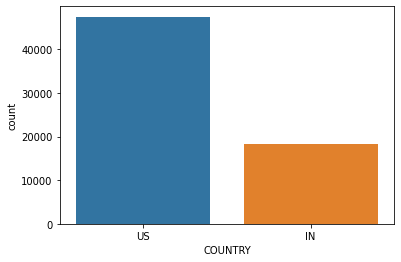

In [11]:
sns.countplot(x='COUNTRY',data=data)

In [12]:
data['YEAR'] = pd.DatetimeIndex(data['DATE']).year
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data.head()

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
0,2019-01-01,US,San Antonio,42.0,2019,1
1,2019-01-01,US,Saint Paul,21.0,2019,1
2,2019-01-01,US,Denver,42.0,2019,1
3,2019-01-01,US,San Francisco,13.0,2019,1
4,2019-01-01,US,Madison,14.0,2019,1


In [13]:
#India data
data_IND = data.loc[data['COUNTRY'] == 'IN']
#US data
data_US = data.loc[data['COUNTRY'] == 'US']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



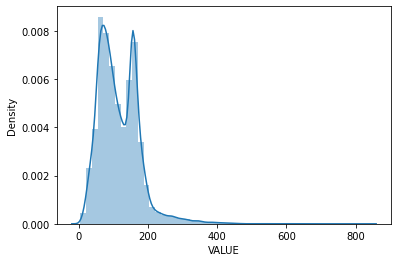

In [14]:
# distribution of AQI for INDIA data
sns.distplot(data_IND["VALUE"])

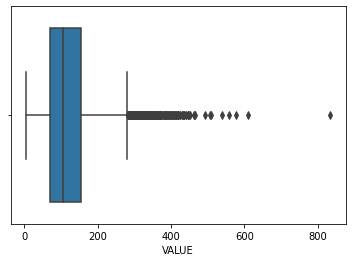

In [15]:
# check outlier
sns.boxplot(x="VALUE", data=data_IND)

In [16]:
#as seen that their is outlier in the india data value
data_IND = data_IND.drop(data_IND[(data_IND['VALUE']>800)].index)
data = data.drop(data[(data['VALUE']>800)].index)

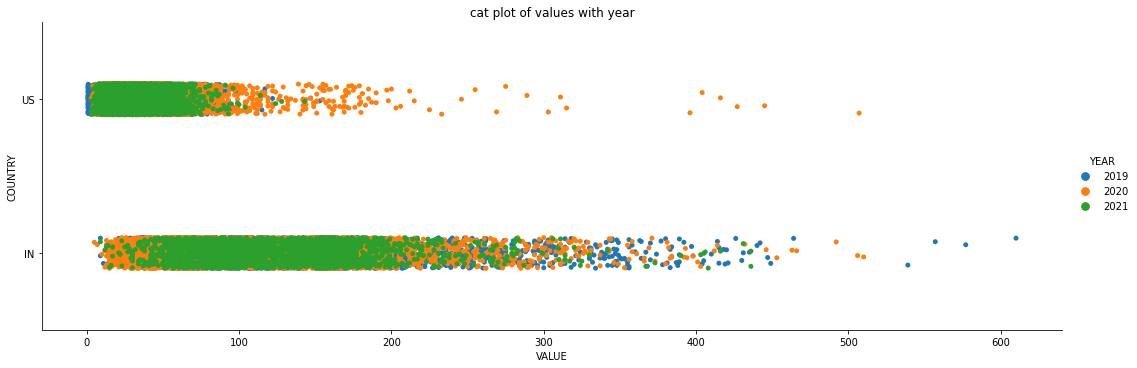

In [17]:
sns.catplot(x="VALUE", y="COUNTRY", hue="YEAR", data=data, height=5, aspect=3)
plt.title("cat plot of values with year");

AQI is more in 2020 and in 2019, 2021 is same 
covid time AQI is less. 

In [18]:
Good = len(data_IND[(data_IND['VALUE']>0) & (data_IND['VALUE']<=30)].count(axis=1))
Satisfactory = len(data_IND[(data_IND['VALUE']>31) & (data_IND['VALUE']<=60)].count(axis=1))
Moderately_polluted = len(data_IND[(data_IND['VALUE']>61) & (data_IND['VALUE']<=90)].count(axis=1))
Poor = len(data_IND[(data_IND['VALUE']>91) & (data_IND['VALUE']<=120)].count(axis=1))
Very_poor = len(data_IND[(data_IND['VALUE']>121) & (data_IND['VALUE']<=250)].count(axis=1))
Severe = len(data_IND[(data_IND['VALUE']>=250)].count(axis=1))

In [19]:
colors = ['lightgreen', 'mediumseagreen', 'yellow', 'orangered', 'darkred', 'red']

Aqi_grp = ['Good','Satisfactory','Moderately Polluted','Poor','Very Poor','Severe']
Aqi_group_val = [Good,Satisfactory,Moderately_polluted,Poor,Very_poor,Severe]

fig = go.Figure(data=[go.Pie(labels=Aqi_grp, values=Aqi_group_val,sort=False,title="AQI Category, Pollutants and Health Breakpoints from Jan 2019 to May 2021 for major Indian Cities",
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

40.5% of Indian Cities fall in very poor category.

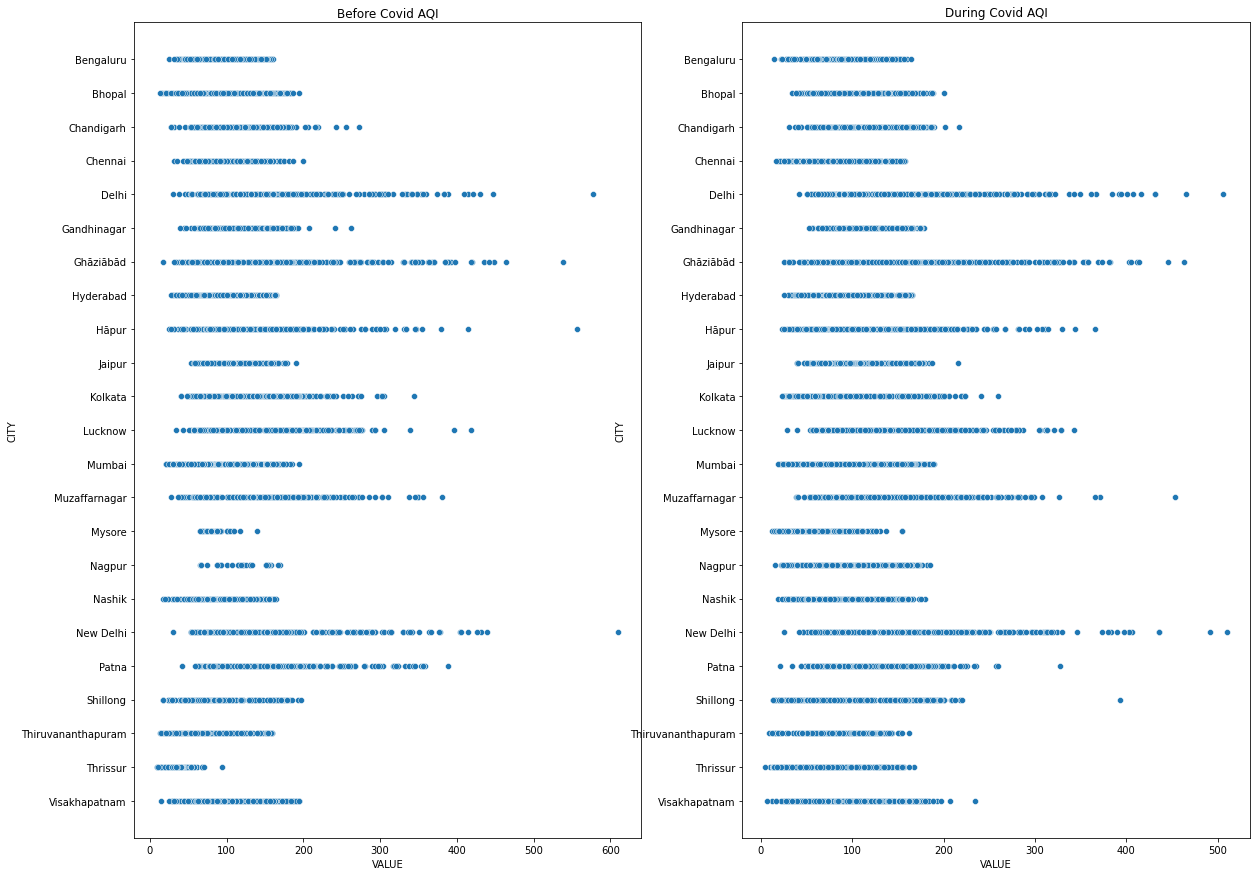

In [20]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,13))
Before_Lockdown = data_IND.drop(data_IND[(data_IND.YEAR>2019)].index)
Before_Lockdown.sort_values(by=["CITY"], inplace = True)
sns.scatterplot(x='VALUE',y='CITY',data=Before_Lockdown,ax=axis1).set_title("Before Covid AQI")

After_Lockdown  = data_IND.drop(data_IND[(data_IND.YEAR==2019)].index)
After_Lockdown.sort_values(by=["CITY"], inplace = True)
sns.scatterplot(x='VALUE',y='CITY',data=After_Lockdown,ax=axis2).set_title("During Covid AQI")
fig.set_size_inches(20, 15)

In [21]:
def maxpollutant_city_beforeLockdown(pollutantcity):
    polu = Before_Lockdown[[pollutantcity,"CITY"]].groupby(["CITY"]).mean().sort_values(by = pollutantcity,ascending = False).reset_index()
    polu[pollutantcity] = round(polu[pollutantcity],2)  
    return polu[:10]

def maxpollutant_city_afterLockdown(pollutantcity):
    polu = After_Lockdown[[pollutantcity,"CITY"]].groupby(["CITY"]).mean().sort_values(by = pollutantcity,ascending = False).reset_index()
    polu[pollutantcity] = round(polu[pollutantcity],2)  
    return polu[:10]


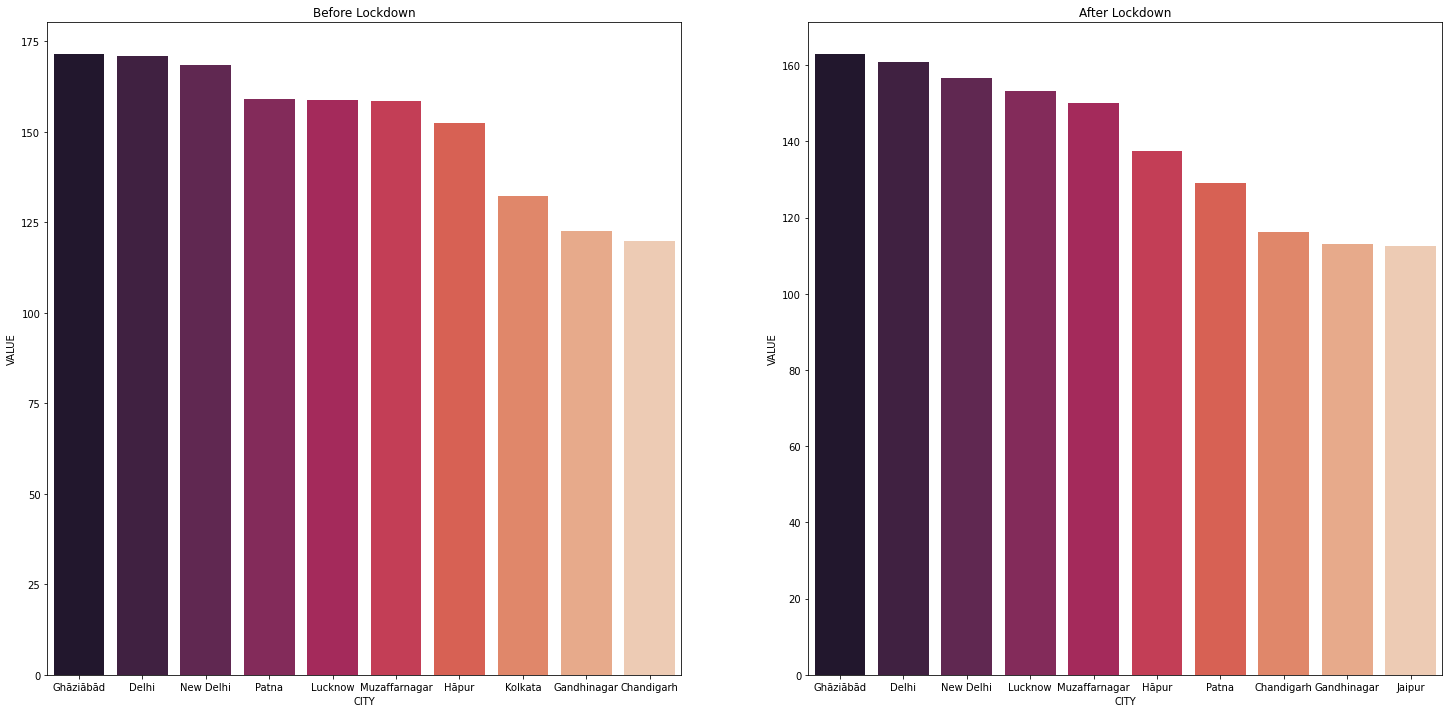

In [22]:
BeforLockdown_Cities = maxpollutant_city_beforeLockdown("VALUE")
AfterLockdown_Cities = maxpollutant_city_afterLockdown("VALUE")

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,13))
sns.barplot(x = BeforLockdown_Cities["CITY"], y= BeforLockdown_Cities["VALUE"], data = BeforLockdown_Cities, ax=axis1,palette="rocket").set_title("Before Lockdown") 
sns.barplot(x = AfterLockdown_Cities["CITY"], y= AfterLockdown_Cities["VALUE"], data = AfterLockdown_Cities, ax=axis2,palette="rocket").set_title("After Lockdown")
fig.set_size_inches(25, 12)
plt.show()

In [23]:
# change the month such as first year 1-12, 2 year 12-24
data_MF = (data_IND[(data_IND['MONTH']>0) & (data_IND['YEAR']==2020)])

In [24]:
data_MF

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
28212,2020-01-01,IN,Hyderabad,112.0,2020,1
28214,2020-01-01,IN,Bhopal,150.0,2020,1
28216,2020-01-01,IN,New Delhi,383.0,2020,1
28224,2020-01-01,IN,Thrissur,39.0,2020,1
28246,2020-01-01,IN,Delhi,392.0,2020,1
...,...,...,...,...,...,...
59218,2020-12-31,IN,Chennai,102.0,2020,12
59221,2020-12-31,IN,New Delhi,299.0,2020,12
59227,2020-12-31,IN,Thiruvananthapuram,72.0,2020,12
59229,2020-12-31,IN,Hyderabad,165.0,2020,12


In [25]:
data_MF.loc[28212:59235,'MONTH'] += 12
data_IND.loc[28212:59235,'MONTH'] = data_MF

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
data_IND

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
9,2019-01-01,IN,New Delhi,314.0,2019,1
10,2019-01-01,IN,Chennai,135.0,2019,1
13,2019-01-01,IN,Nashik,160.0,2019,1
19,2019-01-01,IN,Chandigarh,163.0,2019,1
21,2019-01-01,IN,Bhopal,175.0,2019,1
...,...,...,...,...,...,...
68975,2021-05-31,IN,Mysore,50.0,2021,5
68977,2021-05-31,IN,Bengaluru,36.0,2021,5
68980,2021-05-31,IN,Hyderabad,65.0,2021,5
68982,2021-05-31,IN,Lucknow,118.0,2021,5


In [27]:
data_MF

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
28212,2020-01-01,IN,Hyderabad,112.0,2020,13
28214,2020-01-01,IN,Bhopal,150.0,2020,13
28216,2020-01-01,IN,New Delhi,383.0,2020,13
28224,2020-01-01,IN,Thrissur,39.0,2020,13
28246,2020-01-01,IN,Delhi,392.0,2020,13
...,...,...,...,...,...,...
59218,2020-12-31,IN,Chennai,102.0,2020,24
59221,2020-12-31,IN,New Delhi,299.0,2020,24
59227,2020-12-31,IN,Thiruvananthapuram,72.0,2020,24
59229,2020-12-31,IN,Hyderabad,165.0,2020,24


In [28]:
data_FF = (data_IND[(data_IND['MONTH']>0) & (data_IND['YEAR']==2021)])
data_FF.loc[59282:68987,'MONTH'] += 24
data_IND.loc[59282:68987,'MONTH'] = data_FF

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
data_IND

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
9,2019-01-01,IN,New Delhi,314.0,2019,1
10,2019-01-01,IN,Chennai,135.0,2019,1
13,2019-01-01,IN,Nashik,160.0,2019,1
19,2019-01-01,IN,Chandigarh,163.0,2019,1
21,2019-01-01,IN,Bhopal,175.0,2019,1
...,...,...,...,...,...,...
68975,2021-05-31,IN,Mysore,50.0,2021,29
68977,2021-05-31,IN,Bengaluru,36.0,2021,29
68980,2021-05-31,IN,Hyderabad,65.0,2021,29
68982,2021-05-31,IN,Lucknow,118.0,2021,29


In [30]:
data_IND.head()

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH
9,2019-01-01,IN,New Delhi,314.0,2019,1
10,2019-01-01,IN,Chennai,135.0,2019,1
13,2019-01-01,IN,Nashik,160.0,2019,1
19,2019-01-01,IN,Chandigarh,163.0,2019,1
21,2019-01-01,IN,Bhopal,175.0,2019,1


In [31]:
px.scatter(data_IND, x = "MONTH", y = "VALUE", animation_frame = "MONTH", animation_group = "CITY",
           color = "CITY", size='VALUE',range_x=[1,30], range_y=[0,600],)

Here we can see, that during 15th month i.e March 2020 all the bubbles(cities) aqi comes down, this was the time when India's First Lockdown was announced i.e 25 Mar 2020 – 31 May 2020¶
Again in 23rd month i.e November 2020, as lockdowns were eased and due to diwali there is an increase in the AQI value w.r.t pm2.5 and again as the second wave hits the bubbles comes down
One more interesting detail is Thrissur has the lowest AQI value among the all and is almost consistent throughout

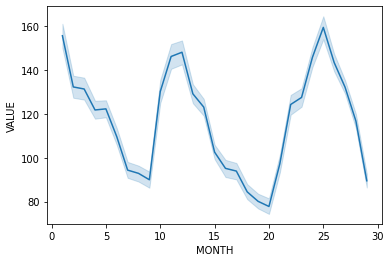

In [32]:
sns.lineplot(x="MONTH", y="VALUE", data=data_IND)

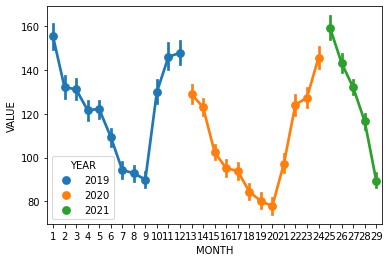

In [33]:
sns.pointplot(x='MONTH',y='VALUE',hue='YEAR',data=data_IND)

We will calculate the simple moving averge over a peroid of 20months, i.e window size 20

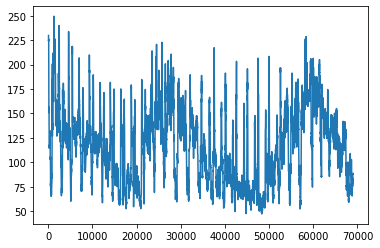

In [34]:
data_IND['VALUE'].rolling(window =20).mean().plot()

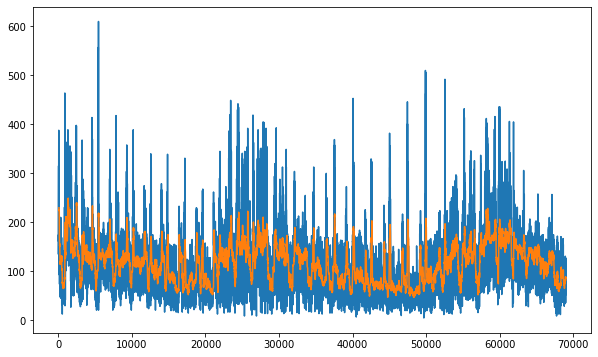

In [35]:
data_IND['VALUE'].plot(figsize=(10,6))
data_IND['VALUE'].rolling(window =20).mean().plot()

Here we can see the yellow line is the moving average and it helps us to smoothen the data and we can see the trend in the data

In [36]:
data_IND['moving_avg'] = data_IND['VALUE'].rolling(window =20).mean()
data_IND.tail(20)

,DATE,COUNTRY,CITY,VALUE,YEAR,MONTH,moving_avg
68917,2021-05-31,IN,New Delhi,97.0,2021,29,75.30
68918,2021-05-31,IN,Muzaffarnagar,127.0,2021,29,79.30
68921,2021-05-31,IN,Chandigarh,125.0,2021,29,79.85
68922,2021-05-31,IN,Mumbai,72.0,2021,29,79.25
68925,2021-05-31,IN,Thrissur,54.0,2021,29,78.85
68930,2021-05-31,IN,Jaipur,131.0,2021,29,81.15
68936,2021-05-31,IN,Visakhapatnam,96.0,2021,29,82.90
68941,2021-05-31,IN,Bhopal,71.0,2021,29,83.20
68947,2021-05-31,IN,Chennai,51.0,2021,29,82.25
68948,2021-05-31,IN,Thiruvananthapuram,58.0,2021,29,81.30


# Moving Average as Prediction

In [37]:
data_avge = data_IND.drop(['DATE','COUNTRY', 'CITY', 'YEAR', 'moving_avg' ],axis=1)

In [38]:
data_avge.head()

,VALUE,MONTH
9,314.0,1
10,135.0,1
13,160.0,1
19,163.0,1
21,175.0,1


In [39]:
data_avge.set_index('MONTH', inplace=True)
data_avge.index.name = 'Month'
data_avge

,VALUE
Month,
1,314.0
1,135.0
1,160.0
1,163.0
1,175.0
...,...
29,50.0
29,36.0
29,65.0


Let us plot the distribution of the data over the few months from 2019 Jan - 2021 May

Text(0, 0.5, 'Value')

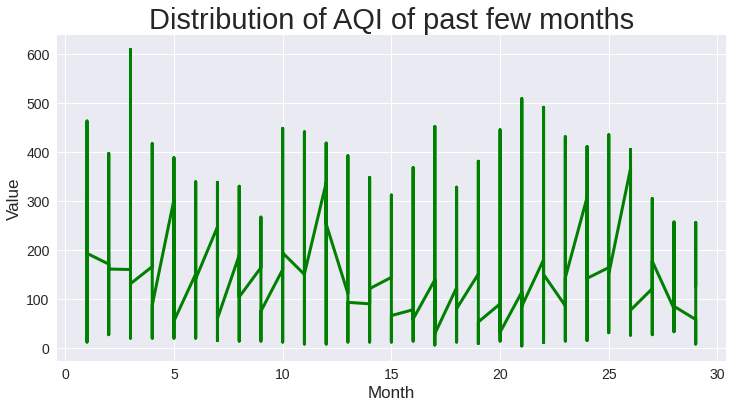

In [40]:
plt.style.use('seaborn')
data_avge.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Distribution of AQI of past few months', fontsize=29)
plt.xlabel('Month', fontsize=17)
plt.ylabel('Value', fontsize=17)

In [41]:
list1 = []
list2 = []
X = data_avge.values
windows = 8
history = [X[i] for i in range(windows)]

In [42]:
data_avge

,VALUE
Month,
1,314.0
1,135.0
1,160.0
1,163.0
1,175.0
...,...
29,50.0
29,36.0
29,65.0


In [43]:
tests = [ X[i] for i in range(windows,len(X))]
prediction = list()

In [44]:
#Just for printing the top8 predicted and expected values
counters = 0
print("Printing first 8 values")
# walk forward over time steps in test
for t in range(len(tests)):
    len1 = len(history)
    yhat = mean([history[i] for i in range(len1-windows,len1)])
    obss = tests[t]
    prediction.append(yhat)
    history.append(obss)
    ##Uncomment below code to see the predicted and expected value
    if(counters<8):   
        print('predicted=%f, expected=%f' % (yhat, obss))
    list1.append(yhat)
    list2.append(obss)
    counters+=1
error = mean_squared_error(tests, prediction)
print('Test MSE: %.3f' % error)

Printing first 8 values
predicted=224.500000, expected=388.000000
predicted=233.750000, expected=172.000000
predicted=238.375000, expected=235.000000
predicted=247.750000, expected=130.000000
predicted=243.625000, expected=166.000000
predicted=242.500000, expected=169.000000
predicted=243.500000, expected=310.000000
predicted=239.625000, expected=153.000000
Test MSE: 2429.270


In [45]:
np.sqrt(mean_squared_error(list1,list2))

49.28762444442754

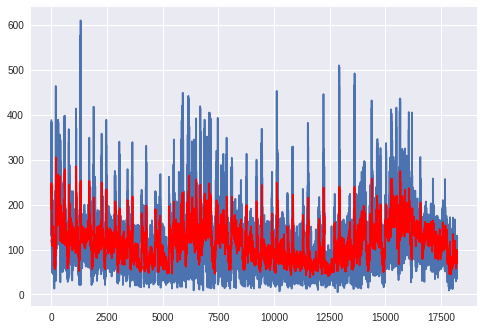

In [46]:
pyplot.plot(tests)
pyplot.plot(prediction, color='red')
pyplot.show()

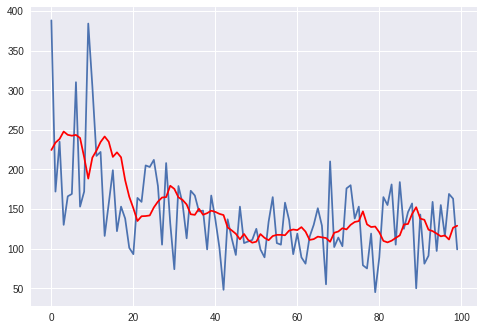

In [47]:
pyplot.plot(tests[0:100])
pyplot.plot(prediction[0:100], color='red')
pyplot.show()

In [48]:
new_data=data_IND[['DATE','VALUE']]

In [49]:
new_data.head()

,DATE,VALUE
9,2019-01-01,314.0
10,2019-01-01,135.0
13,2019-01-01,160.0
19,2019-01-01,163.0
21,2019-01-01,175.0


In [50]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18238 entries, 9 to 68987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    18238 non-null  object 
 1   VALUE   18238 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [51]:
# need to convert date into datetime
new_data["DATE"]=pd.to_datetime(new_data["DATE"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
#check the minimum and maxminum date 
new_data.DATE.min(), new_data.DATE.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [53]:
# Total number of days
new_data.DATE.max()- new_data.DATE.min()

Timedelta('881 days 00:00:00')

In [54]:
warnings.filterwarnings('ignore')

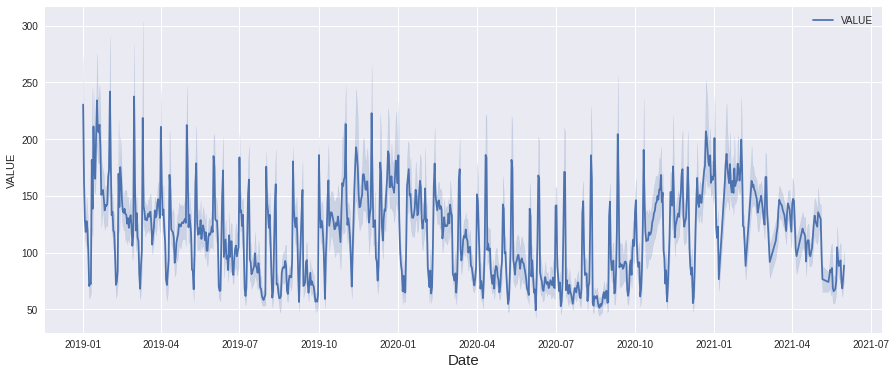

In [55]:
# plot indicator and find the diffrentiate corresponding
col=["VALUE"]
plt.figure(figsize=(15,6))
plt.grid(True)
for i in col:
  sns.lineplot(new_data["DATE"],new_data[i],label=i)
  plt.xlabel("Date",fontsize=15)

The way to Evalute the time series follow this criteria

sequence Visulization
histogram , auto-correlation
Statistical analyis
adfuller test

trend how things are overall changing
seasonality how things change within a given period e.g. a year, month, week, day
error/residual/irregular activity not explained by the trend or the seasonal value

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
df=new_data.set_index("DATE")

In [79]:
df.head()

,VALUE
DATE,
2019-01-01,314.0
2019-01-01,135.0
2019-01-01,160.0
2019-01-01,163.0
2019-01-01,175.0


In [59]:
decompose_additive= seasonal_decompose(df["VALUE"],model="additive",freq=12,)

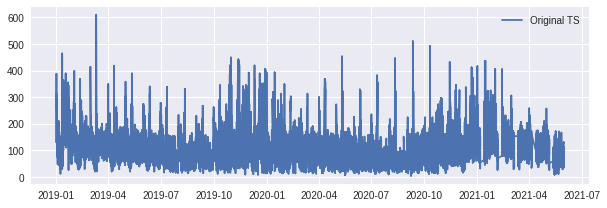

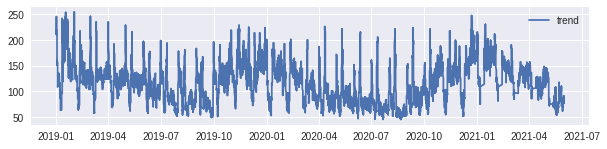

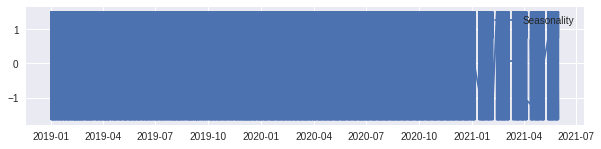

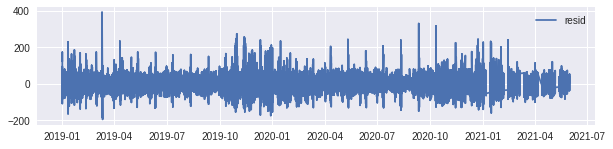

In [60]:
plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(df["VALUE"],label='Original TS')
plt.grid('True')
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(412)
plt.plot(decompose_additive.trend,label='trend')
plt.grid("True")
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(413)
plt.plot(decompose_additive.seasonal,label='Seasonality')
plt.grid("True")
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(414)
plt.plot(decompose_additive.resid,label='resid')
plt.grid("True")
plt.legend(loc='best')

In [61]:
decompose_multiplicative= seasonal_decompose(df["VALUE"],model="multiplicative",freq=12)

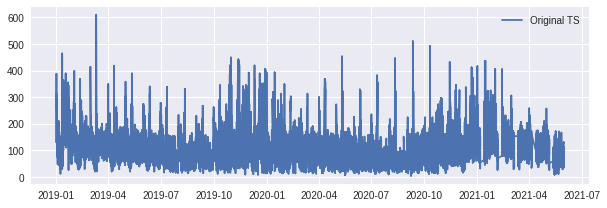

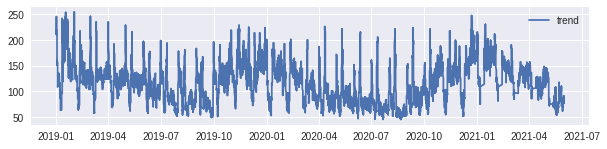

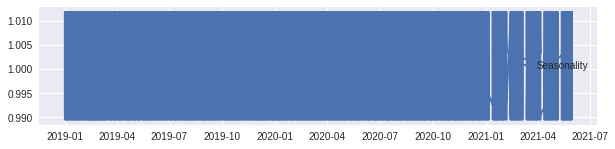

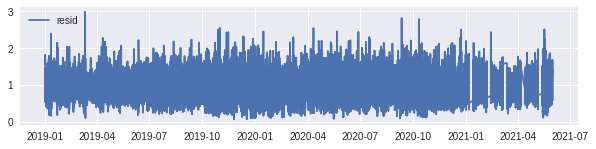

In [62]:
plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(df["VALUE"],label='Original TS')
plt.grid('True')
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(412)
plt.plot(decompose_multiplicative.trend,label='trend')
plt.grid("True")
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(413)
plt.plot(decompose_multiplicative.seasonal,label='Seasonality')
plt.grid("True")
plt.legend(loc='best')
plt.figure(figsize=(10,10))
plt.subplot(414)
plt.plot(decompose_multiplicative.resid,label='resid')
plt.grid("True")
plt.legend(loc='best')

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

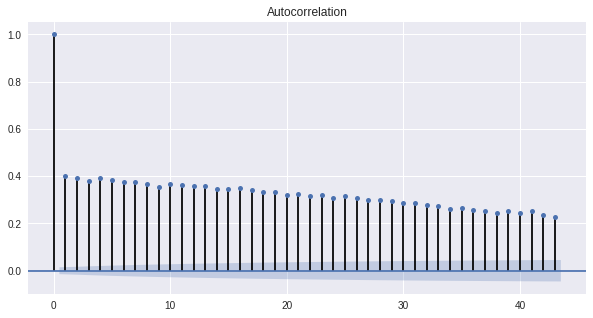

In [64]:
plt.rc("figure",figsize=(10,5))
plot_acf(df["VALUE"])
plt.grid("True")
print()

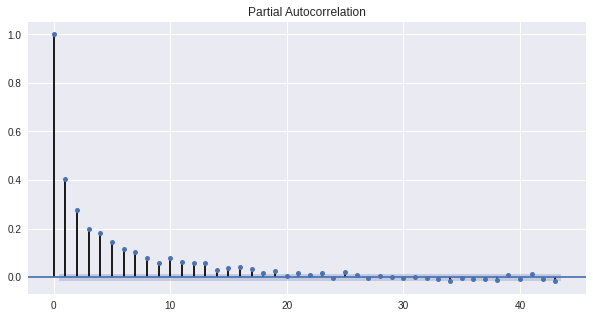

In [65]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['VALUE'])
plt.grid("True")
print()


In [66]:
from statsmodels.tsa.stattools import adfuller

H0= Serie corresponds to non-stationary type. H1= Serie corresponds to stationary type.

In [67]:
result = adfuller(df['VALUE'])

In [68]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.362724
p-value: 0.000000


In [118]:
new_df=df['VALUE'].iloc[:-4]

In [113]:
import math

In [119]:
train_len = math.ceil(len(new_df)*0.8)
train_len

14588

In [120]:
train_data = new_df[0:train_len]
train_data.head()

DATE
2019-01-01    314.0
2019-01-01    135.0
2019-01-01    160.0
2019-01-01    163.0
2019-01-01    175.0
Name: VALUE, dtype: float64

In [116]:
window=8

In [121]:
X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [122]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

reshaping the training set to (number of records-window, number of time steps, 1):

In [123]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(14580, 8, 1)

In [124]:
X_train

array([[[314.],
        [135.],
        [160.],
        ...,
        [161.],
        [341.],
        [347.]],

       [[135.],
        [160.],
        [163.],
        ...,
        [341.],
        [347.],
        [388.]],

       [[160.],
        [163.],
        [175.],
        ...,
        [347.],
        [388.],
        [172.]],

       ...,

       [[165.],
        [161.],
        [197.],
        ...,
        [102.],
        [114.],
        [ 68.]],

       [[161.],
        [197.],
        [161.],
        ...,
        [114.],
        [ 68.],
        [154.]],

       [[197.],
        [161.],
        [147.],
        ...,
        [ 68.],
        [154.],
        [147.]]])

# model building using LSTM

In [125]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [126]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

In [127]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [128]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [129]:
X_val.shape, Y_val.shape

((3646, 8, 1), (3646,))

In [130]:
prediction = model.predict(X_val)

In [131]:
len(prediction), len(Y_val)

(3646, 3646)

In [132]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 48.91885462394788
Validation rmse: 48.46277188384123


In [133]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,VALUE,Predictions
DATE,,
2020-11-22,197.0,121.158813
2020-11-22,193.0,127.406822
2020-11-22,150.0,132.958145
2020-11-22,173.0,133.000229
2020-11-22,86.0,141.315552
...,...,...
2021-05-31,68.0,85.717407
2021-05-31,127.0,82.879723
2021-05-31,115.0,89.884285


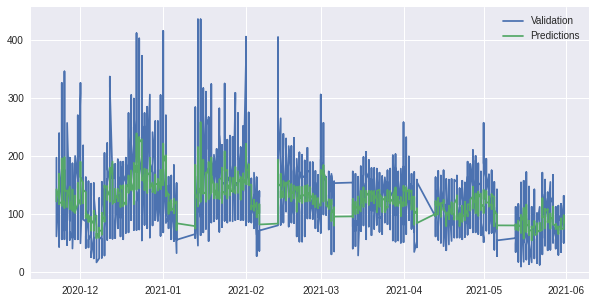

In [135]:
plt.plot(valid[['VALUE','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

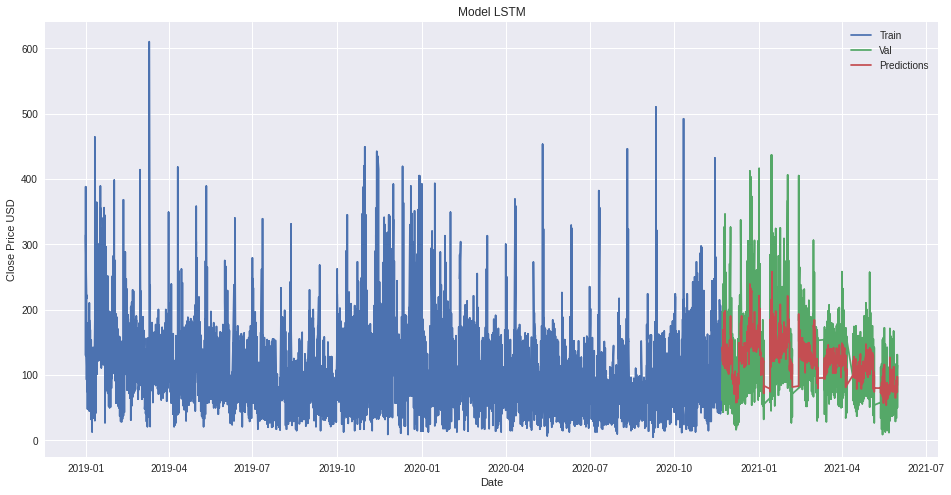

In [137]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.plot(train)
plt.plot(valid[['VALUE','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

# Simplpe RNN

In [138]:
from keras.layers import SimpleRNN

In [139]:
model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)


In [140]:
print('Train rmse:',np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
print('Validation rmse:',np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

Train rmse: 45.98
Validation rmse: 49.42


In [141]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,VALUE,Predictions
DATE,,
2020-11-22,197.0,125.692818
2020-11-22,193.0,130.445007
2020-11-22,150.0,131.177475
2020-11-22,173.0,129.255737
2020-11-22,86.0,144.435135
...,...,...
2021-05-31,68.0,83.960495
2021-05-31,127.0,83.718048
2021-05-31,115.0,98.162079


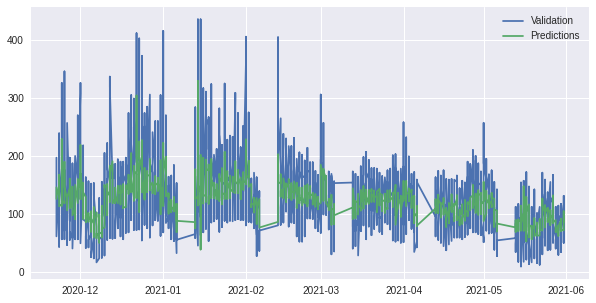

In [142]:
plt.plot(valid[['VALUE','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()